# Basic Convolutional Neural Network
***Honors Project by Peyton Warren***

This neural net uses the MNIST dataset with the listed layers:
1. Convolutional layer
2. Max Pooling layer
3. Fully Connected layer

In [63]:
from __future__ import print_function
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Dense, Reshape
from keras.models import Sequential
from keras.optimizers import SGD

import matplotlib.pylab as plt

(60000, 28, 28, 1)


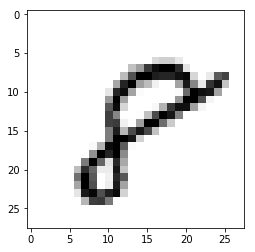

In [64]:
# Data setup
# Download mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# creating the image dimension variables and the number of channels
img_x, img_y = x_train.shape[1], x_train.shape[2]
channels = 1

plt.imshow(x_train[59999], cmap=plt.cm.binary)

# Reshape into 4D tensor with tensorflow reshape function
# Putting it into the format "channels_last" data format (batch, cols, rows, channels)
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, channels)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, channels)

# change data type to floating point numbers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data, x_train & x_test now between 0 and 1
x_train /= 255
x_test /= 255

# print(type(x_train))    # x_train is a numpy.ndarray object
print(x_train.shape)

In [65]:
# Settings for training the model later on
batch_size = 128    # 128 items in the training data are being used
num_classes = 10    # Number of classifications
epochs = 10         # performing 10 epochs

In [66]:
model = Sequential()

In [67]:
# Adds layers

# Convolutional Layer
model.add(Conv2D(32,
                 kernel_size = (5, 5), strides = (1, 1), # (5, 1),
                 activation='relu',
                 input_shape=(img_x, img_y, channels)))

# Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fully Connected Layer
model.add(Dense(num_classes))

In [68]:
# Optimizer: Stochastic Gradient Descent
sgd = SGD(lr=0.0001)

# Compile follows setting up the neural network
model.compile(optimizer=sgd,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [69]:
model.fit(x_train, y_train,      # inputing the training x and y
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,             # verbose 1 means it has a progress bar for every epoch
          validation_data=(x_test, y_test))

ValueError: Error when checking target: expected dense_14 to have 4 dimensions, but got array with shape (60000, 1)